# Project Definition

### Project Overview

The purpose of this project is to analyze the patients' medical records like their blood pressure, cholesterol level, blood sugar, etc. Furthermore, a ML algorithm will be used to classify the patients based on whether or not they have a chance of having a heart attack.

There will be one dataset:
heart_disease_uci.csv, which is the main dataset that contains the patients' ages, sex, and other medical records.

### Project Problem

Heart attack is a serious medical condition that may be life-threatening. It is happened because of a blockage in the blood vessels that disrupt the flow of the blood to the heart. The cause of the heart attack is that some substances like cholesterol, calcium, fats, proteins, and inflammatory cells are build up in the blood vessels and form plaques. Sudden ruptures of the plaques lead the platelets to cover it up, consequently, a clot is formed in the blood vessel and narrows, or completely blocks the pathway of the blood to the heart. The lack of blood supply leads to a lack of oxygen that's needed for the heart to function, this can damage or destroy part of the myocardium (heart muscles).

Researchers find that there are a lot of risk factors for getting a heart attack, like the increase in age, high blood cholesterol, high blood pressure, etc. Therefore, it is critical to know the probability of getting a heart attack based on these risk factors to prevent it, or at least early detect it to save patients' life.



### Metrics
 The accuracy and f1- score are used to evaluete the model.
 - The accuracy is the ratio of correctly predicted values (true positive) to the total predictions:
 
 $$accuracy= \frac{TruePositive + TrueNegative}{TruePositive + TrueNegative+ FalsePositive + FalseNegative}$$
 
 - The f1-score is the harmonic mean of the precision and recall: 

$$f1-score= 2 * \frac{precision*recall}{precision+recall}$$

where: 
$$precision= \frac{TruePositive}{TruePositive + FalsePositive}$$
 
$$recall= \frac{TruePositive}{TruePositive +  FalseNegative}$$
 
The model has multi-class target variables which are the probability of getting a heart attack from 0 ( not likely to get a heart attack) to 4 ( more likely to get a heart attack). The model may predict one/ two classes perfectly and neglect the other classes especially with the class imbalance in the dataset, which leads to an increase in the accuracy with the poor performance. For that reason, accuracy is not enough to judge the model performance.

To bring more detail about the performance of the model, precision and recall could be used. However, it is difficult to compare the performance of two models one with high precision and the other with high recall. So, the f1- score can give the balance between the two matrices, and make the comparison easier. 



# Analysis

### Data Exploration

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline
# read the data from the csv files and save it in dataframes
df = pd.read_csv('heart_disease_uci.csv')

In [2]:
# Show df to get an idea of the data
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
# show the shape of the df
df.shape

(920, 16)

#### The row of the dataset is represent the records of on patient, it contain records for 920 patients.
#### There is 16 column in this dataset. 

This is an explaniation of each column taken from the [data_source](https://www.kaggle.com/redwankarimsony/heart-disease-data)

1. id (Unique id for each patient)
2. age (Age of the patient in years)
3. origin (place of study)
4. sex (Male/Female)
5. cp chest pain type (typical angina, atypical angina, non-anginal, asymptomatic)
6. trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
7. chol (serum cholesterol in mg/dl)
8. fbs (if fasting blood sugar > 120 mg/dl)
9. restecg (resting electrocardiographic results)Values: normal, stt abnormality, lv hypertrophy
10. thalach: maximum heart rate achieved
11. exang: exercise-induced angina (True/ False)
12. oldpeak: ST depression induced by exercise relative to rest
13. slope: the slope of the peak exercise ST segment
14. ca: number of major vessels (0-3) colored by fluoroscopy
15. thal: normal; fixed defect; reversible defect
16. num: the predicted attribute

In [4]:
# explore some info about the dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


### Data cleaning

In [5]:
# drop unwanted columns
df.drop(columns=['dataset','slope' ],inplace=True,axis=1)

In [6]:
#identify whether or not there are duplicated rows
df.duplicated().sum()

0

In [7]:
#How many missing values in the dataset? 
df.isnull().sum()

id            0
age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
ca          611
thal        486
num           0
dtype: int64

In [8]:
# create a functions to remove the null values/ zeros from numerical columns

def clean_col(df,col_to_clean):
    '''
    INPUT:
    df- The source dataframe
    col_to_clean- a list of columns with null values
    
    OUTPUT:
    df - a new dataframe after replacing the null values and zero values with the the mean value of its heart 
    attack class (num col)
    '''
    # change the null valuees with the mean of its heart attack class (num column) :
    for col in  col_to_clean:
        col_class_mean= df.groupby('num').mean()[col]
        for i in range(df.shape[0]):
            if pd.isnull(df.loc[i,col])== True or df.loc[i,col]==0 :
                if df.num[i]==0:
                    df.loc[i,col]= col_class_mean[0]
                elif df.num[i]==1:
                    df.loc[i,col]= col_class_mean[1]
                elif df.num[i]==2:
                    df.loc[i,col]= col_class_mean[2]
                elif df.num[i]==3:
                    df.loc[i,col]= col_class_mean[3]
                else:
                    df.loc[i,col]= col_class_mean[4]

    return df

In [9]:
# remove the null values/ zeros from trestbps,chol,thalch,oldpeak columns
col_to_clean= ['trestbps','chol','thalch','oldpeak']
df= clean_col(df,col_to_clean)


In [10]:
#How many missing values in the dataset? 
df.isnull().sum()

id            0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs          90
restecg       2
thalch        0
exang        55
oldpeak       0
ca          611
thal        486
num           0
dtype: int64

In [11]:
# remove the columns that have null values greater than 50%
most_missing_cols = set(df.columns[df.isnull().mean()>= 0.5]) #Provide a set of columns with more than 50% of the values missing
for col in df.columns:
    if col in most_missing_cols:
        df.drop(col, axis=1, inplace=True)
df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,1,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0
1,2,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2
2,3,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1
3,4,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0
4,5,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0


In [12]:
# create a functions to remove the null values in boolean cols

def clean_bool_col(df,col_to_clean):
    '''
    INPUT:
    df - The source dataframe
    col_to_clean- a list of columns with null values
    
    OUTPUT:
    df - a new dataframe after replacing the null values and with the the mean value of its heart 
    attack class (num col)
    '''
    # change the null valuees with the mean blood pressure of its heart attack class (num column) :
    for col in  col_to_clean:
        df[col]= df[col].astype(np.float32)
        col_class_mean= round(df.groupby('num').mean()[col])
        for i in range(df.shape[0]):
            if pd.isnull(df.loc[i,col])== True:
                if df.num[i]==0:
                    df.loc[i,col]= col_class_mean[0]
                elif df.num[i]==1:
                    df.loc[i,col]= col_class_mean[1]
                elif df.num[i]==2:
                    df.loc[i,col]= col_class_mean[2]
                elif df.num[i]==3:
                    df.loc[i,col]= col_class_mean[3]
                else:
                    df.loc[i,col]= col_class_mean[4]

    return df

In [13]:
# remove the null values in boolean cols
col_to_clean= ['fbs','exang']
df= clean_bool_col(df,col_to_clean)

In [14]:
# drop the null col in restecg col
df.dropna(axis=0,subset=['restecg'], inplace= True)

In [15]:
#How many missing values in the dataset? 
df.isnull().sum()

id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
num         0
dtype: int64

### Data Visualization

array([[<AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>],
       [<AxesSubplot:title={'center':'thalch'}>],
       [<AxesSubplot:title={'center':'oldpeak'}>],
       [<AxesSubplot:title={'center':'num'}>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>]], dtype=object)

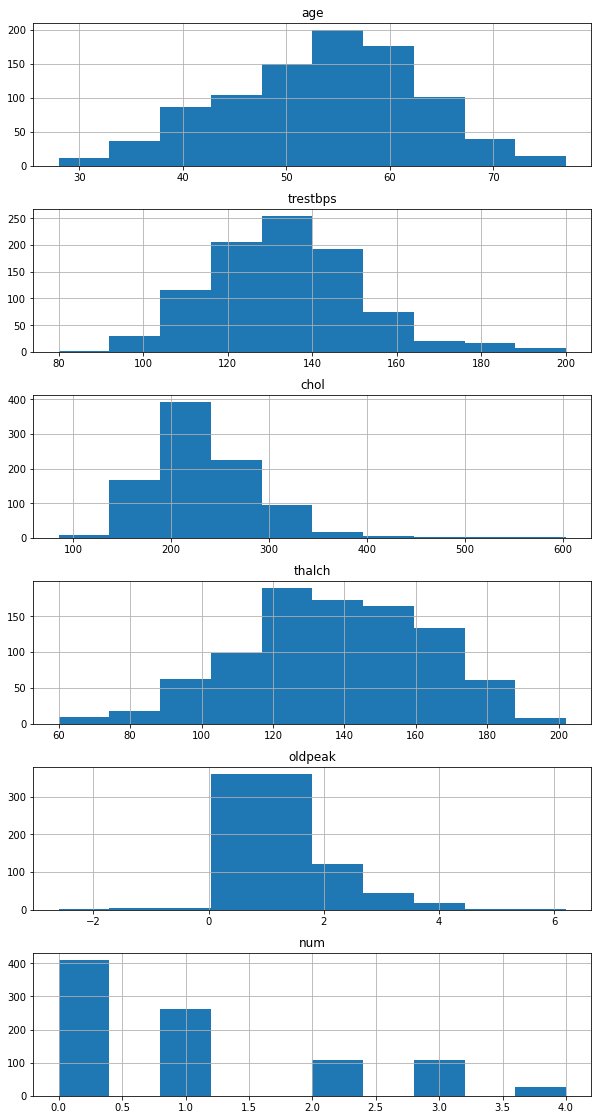

In [16]:
# create a histogram of the numerical columns 
df.hist(column= ['age','trestbps','chol','thalch','oldpeak', 'num'],layout=(9,1),figsize=(10,30) )

<AxesSubplot:xlabel='sex', ylabel='Probability'>

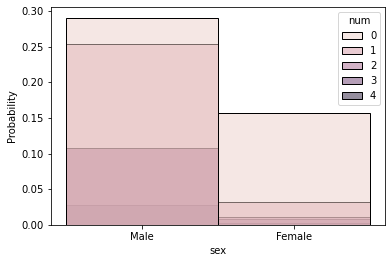

In [17]:
# create a histogram to find the relationship between the probability of getting a heart attack and the sex of the patient
sns.histplot(df, x= 'sex', hue= 'num', stat='probability',bins=6)

<AxesSubplot:xlabel='age', ylabel='Probability'>

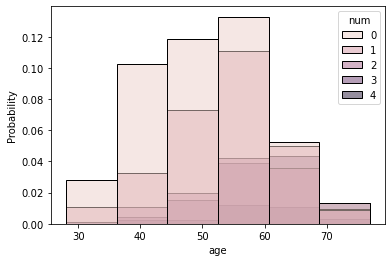

In [18]:
# create a histogram to find the relationship between the probability of getting a heart attack and the age of the patient
sns.histplot(df, x= 'age', hue= 'num', stat='probability',bins=6)

<AxesSubplot:xlabel='trestbps', ylabel='Probability'>

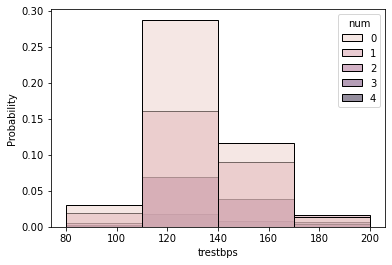

In [19]:
# create a histogram to find the relationship between the probability of getting a heart attack and the blood pressure of the patient
sns.histplot(df, x= 'trestbps', hue= 'num', stat='probability',bins=4)

<AxesSubplot:xlabel='chol', ylabel='Probability'>

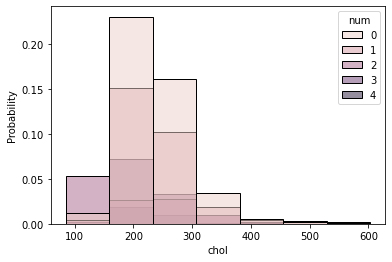

In [20]:
# create a histogram to find the relationship between the probability of getting a heart attack and the cholesterol level of the patient
sns.histplot(df, x= 'chol', hue= 'num', stat='probability',bins=7)

## Methodology

### Data Preprocessing

In [21]:
# Convert the sex column to binary column
df['sex']= df['sex'].map(dict(Male=1, Female=0))

In [22]:
# create a function to encode the categorical variables:

def encode_cat(dataFrame,col_to_encode,dummy_na=True):
    '''
    INPUT:
    dataFrame - The source dataframe that contain the column with categorical variables
    col_to_encode - The column that is wanted to create dummy variables for it
    dummy_na -  A boolean variable that decided whether or not a dummy variable is wanted for NaN
                it is true by default 
    
    OUTPUT:
    df - a new dataframe with the dummy variables columns, after removing the original column 
         that is encoded 
    '''
    for col in  col_to_encode:
        #drop the col
        df1=dataFrame.drop(col, axis=1)
        #create a dummy variable
        df2=pd.get_dummies(dataFrame[col], prefix=col, dummy_na=False)
        #concatenation of the df1 and df2
        dataFrame = pd.concat([df1,df2], axis=1)

    return dataFrame

In [23]:
# encode categorical variables
cols_to_encode=['cp','restecg','num']
df=encode_cat(df,cols_to_encode)

In [24]:
df.head()

,id,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,cp_asymptomatic,...,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,num_0,num_1,num_2,num_3,num_4
0,1,63,1,145.0,233.0,1.0,150.0,0.0,2.3,0,...,0,1,1,0,0,1,0,0,0,0
1,2,67,1,160.0,286.0,0.0,108.0,1.0,1.5,1,...,0,0,1,0,0,0,0,1,0,0
2,3,67,1,120.0,229.0,0.0,129.0,1.0,2.6,1,...,0,0,1,0,0,0,1,0,0,0
3,4,37,1,130.0,250.0,0.0,187.0,0.0,3.5,0,...,1,0,0,1,0,1,0,0,0,0
4,5,41,0,130.0,204.0,0.0,172.0,0.0,1.4,0,...,0,0,1,0,0,1,0,0,0,0


### Implementation

### ML Pipeline 

In [25]:
from sklearn.model_selection import train_test_split
# define the features and the predction variable
X= df.drop(['num_0','num_1','num_2','num_3','num_4'],axis=1).values
Y= df[['num_0','num_1','num_2','num_3','num_4']].values
#split the data to training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=7)

#### 1.  MLP Classifier

In [26]:
from sklearn.neural_network import MLPClassifier
# build the model
MLP= MLPClassifier()
# fit the model to the datasets
MLP.fit(X_train,Y_train)

MLPClassifier()

In [27]:
#predict the propability of getting heart attack
y_pred= MLP.predict(X_test)

In [29]:
# evaluate the model
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86        82
           1       0.82      0.62      0.70        52
           2       0.64      0.29      0.40        24
           3       0.00      0.00      0.00        19
           4       0.00      0.00      0.00         7

   micro avg       0.78      0.64      0.70       184
   macro avg       0.45      0.37      0.39       184
weighted avg       0.67      0.64      0.64       184
 samples avg       0.61      0.64      0.62       184



C:\Users\gftaw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gftaw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
from sklearn import metrics
score=metrics.accuracy_score(Y_test,y_pred)
print('accuracy_score is',score)

accuracy_score is 0.5869565217391305


#### Refinement

In [34]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'alpha': [0.0001,0.001,0.01,0.1],
    'solver' : ['lbfgs', 'sgd', 'adam'],
    'learning_rate' : ['constant', 'invscaling', 'adaptive'],
    'max_iter': [500],
   
}

grid_obj = GridSearchCV(
    estimator=MLP,
    param_grid=parameters,
    n_jobs=-1,
    cv=3
)
grid_obj.fit(X_train,Y_train)
y_pred= grid_obj.predict(X_test)

C:\Users\gftaw\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [35]:
# evaluate the model
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        82
           1       0.79      0.65      0.72        52
           2       0.83      0.42      0.56        24
           3       0.75      0.16      0.26        19
           4       0.00      0.00      0.00         7

   micro avg       0.85      0.66      0.75       184
   macro avg       0.65      0.43      0.49       184
weighted avg       0.81      0.66      0.70       184
 samples avg       0.66      0.66      0.66       184



C:\Users\gftaw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gftaw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
score=metrics.accuracy_score(Y_test,y_pred)
print('accuracy_score is',score)

accuracy_score is 0.657608695652174


In [37]:
grid_obj.best_estimator_

MLPClassifier(activation='logistic', learning_rate='invscaling', max_iter=500)

#### 2. K-Neighbors Classifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier
#build the model
KN= KNeighborsClassifier()
# fit the model to the dataset
KN.fit(X_train,Y_train)
#predict the propability of getting heart attack
y_pred= KN.predict(X_test)
# evaluate the model
print(classification_report(Y_test,y_pred))
score=metrics.accuracy_score(Y_test,y_pred)
print('accuracy_score is',score)

              precision    recall  f1-score   support

           0       0.79      0.78      0.79        82
           1       0.90      0.73      0.81        52
           2       0.55      0.46      0.50        24
           3       0.33      0.16      0.21        19
           4       0.00      0.00      0.00         7

   micro avg       0.76      0.63      0.69       184
   macro avg       0.52      0.43      0.46       184
weighted avg       0.71      0.63      0.67       184
 samples avg       0.63      0.63      0.63       184

accuracy_score is 0.6304347826086957


C:\Users\gftaw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gftaw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Refinement

In [42]:
parameters = {
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':[20,30,40] ,
   
}

grid_obj = GridSearchCV(
    estimator=KN,
    param_grid=parameters,
    n_jobs=-1,
    cv=3
)
grid_obj.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 30, 40],
                         'weights': ['uniform', 'distance']})

In [44]:
y_pred= grid_obj.predict(X_test)
print(classification_report(Y_test,y_pred))
score=metrics.accuracy_score(Y_test,y_pred)
print('accuracy_score is',score)

              precision    recall  f1-score   support

           0       0.80      0.77      0.78        82
           1       0.84      0.69      0.76        52
           2       0.61      0.46      0.52        24
           3       0.36      0.21      0.27        19
           4       0.00      0.00      0.00         7

   micro avg       0.75      0.62      0.68       184
   macro avg       0.52      0.43      0.47       184
weighted avg       0.71      0.62      0.66       184
 samples avg       0.62      0.62      0.62       184

accuracy_score is 0.6195652173913043


C:\Users\gftaw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gftaw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 3. Decision Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
#build the model
DT = DecisionTreeClassifier(random_state=8)
# fit the model to the dataset
DT.fit(X_train,Y_train)
#predict the propability of getting heart attack
y_pred= DT.predict(X_test)
# evaluate the model
print(classification_report(Y_test,y_pred))
score=metrics.accuracy_score(Y_test,y_pred)
print('accuracy_score is',score)

              precision    recall  f1-score   support

           0       0.85      0.95      0.90        82
           1       0.84      0.71      0.77        52
           2       0.71      0.71      0.71        24
           3       0.55      0.63      0.59        19
           4       0.00      0.00      0.00         7

   micro avg       0.78      0.78      0.78       184
   macro avg       0.59      0.60      0.59       184
weighted avg       0.76      0.78      0.77       184
 samples avg       0.78      0.78      0.78       184

accuracy_score is 0.782608695652174


#### Refinement

In [47]:
parameters = {
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'max_features':[5,10,20,30] ,
   
}

grid_obj = GridSearchCV(
    estimator=DT,
    param_grid=parameters,
    n_jobs=-1,
    cv=3
)
grid_obj.fit(X_train,Y_train)
y_pred= grid_obj.predict(X_test)
print(classification_report(Y_test,y_pred))
score=metrics.accuracy_score(Y_test,y_pred)
print('accuracy_score is',score)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        82
           1       0.76      0.85      0.80        52
           2       0.77      0.83      0.80        24
           3       0.75      0.63      0.69        19
           4       0.33      0.14      0.20         7

   micro avg       0.83      0.83      0.83       184
   macro avg       0.71      0.67      0.68       184
weighted avg       0.82      0.83      0.82       184
 samples avg       0.83      0.83      0.83       184

accuracy_score is 0.8260869565217391


C:\Users\gftaw\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.66348277 0.54088324 0.69212111 0.60490688        nan        nan
        nan        nan 0.65400914 0.56265752 0.69485335 0.63895952
        nan        nan        nan        nan]
  warnings.warn(


In [49]:
grid_obj.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_features=10, random_state=8)